# Exercise 1 – Iris Flower Species

## Libs download

## Import libs

In [26]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


## 1. Download the dataset: Iris flower dataset


In [2]:
iris = datasets.load_iris()
dataIris = pd.DataFrame(iris.data)
tagetsIris = pd.DataFrame(iris.target)
irisColumns = pd.DataFrame(iris.feature_names)

## 2. Visualize the shape of the matrix.

In [3]:
display(dataIris.shape)
display(tagetsIris.shape)

(150, 4)

(150, 1)

## 3. Find the maximum, minimum, mean and standard deviation values for each variable.

In [4]:
dataIris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. How many samples are there for each flower species?

In [5]:
tagetsIris.value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 5. Find the maximum, minimum, mean and standard deviation values for each variable of each species.

In [7]:
dataSet = pd.DataFrame(iris.data, columns=iris.feature_names)
dataSet['label'] = iris.target
dataSet['species'] = dataSet['label'].replace(to_replace=[0,1,2], value=[iris.target_names[0], iris.target_names[1], iris.target_names[2]])
dataSet

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
dataSet.loc[dataSet['species'] == 'setosa'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [9]:
dataSet.loc[dataSet['species'] == 'versicolor'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [10]:
dataSet.loc[dataSet['species'] == 'virginica'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


## 6. Are there missing data? Are the data consistent with the expected dimensions? Are there outliers? Is the database balanced? Visualize the data through boxplots.

In [11]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


- Are there missing data? No

- Are the data consistent with the expected dimensions? Yes, because we expected four columns of features per species. Based on the dataset all species have four columns of features.


- Are there outliers? Observing the boxplots, its possible to conclude that there are outliers. For analysis, the first boxplot doesnt have to be considerated, because the comparation is being done between differents species.  Comparing the features amoug each species, its possible see outliers for at least one specie


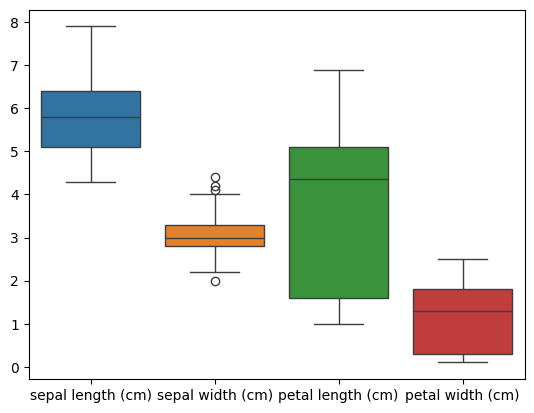

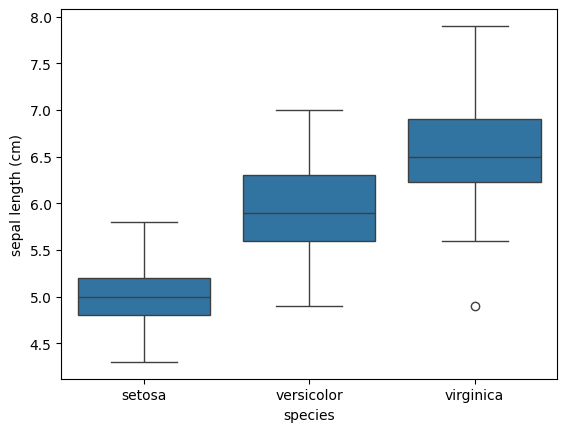

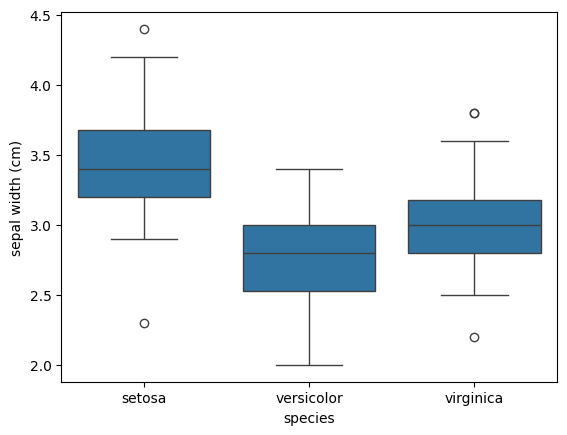

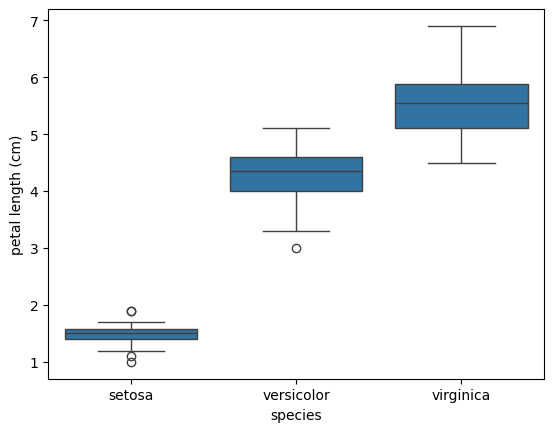

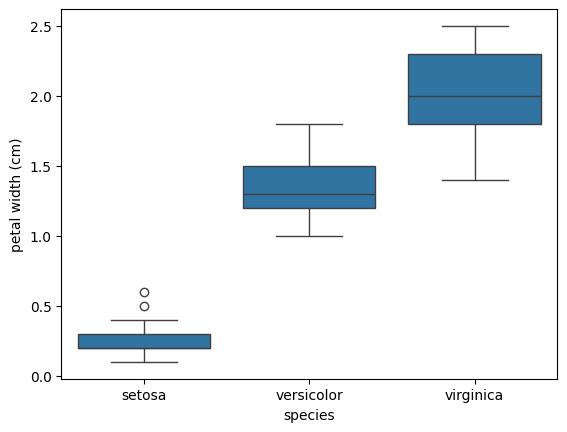

In [12]:
# dataSet.loc[dataSet['species'] == 'virginica'].drop('label', axis=1)
dataSet_no_label = dataSet.drop('label', axis=1)

sns.boxplot(data=dataSet_no_label)
plt.show()
sns.boxplot(data=dataSet, x='species', y='sepal length (cm)')
plt.show()

sns.boxplot(data=dataSet, x='species', y='sepal width (cm)')
plt.show()

sns.boxplot(data=dataSet, x='species', y='petal length (cm)')
plt.show()

sns.boxplot(data=dataSet, x='species', y='petal width (cm)')
plt.show()




## 7. Plot the average values for each flower species and the overall average, considering the length of petals and sepals.

<Figure size 1500x1500 with 0 Axes>

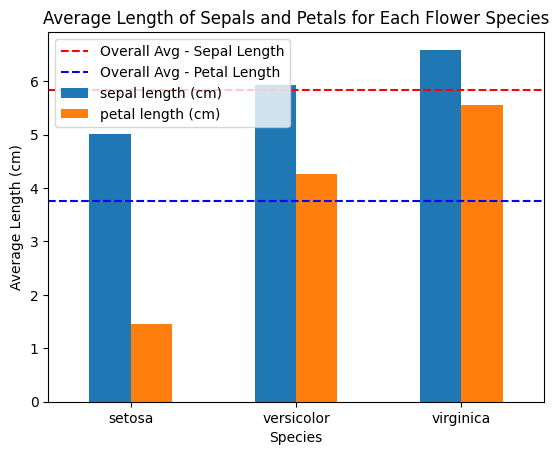

In [13]:
avg_values = dataSet.groupby('species')[['sepal length (cm)', 'petal length (cm)']].mean()
overall_avg = dataSet[['sepal length (cm)', 'petal length (cm)']].mean()
plt.figure(figsize=(15, 15)) 
avg_values.plot(kind='bar', rot=0)
plt.axhline(overall_avg['sepal length (cm)'], color='r', linestyle='--', label='Overall Avg - Sepal Length')
plt.axhline(overall_avg['petal length (cm)'], color='b', linestyle='--', label='Overall Avg - Petal Length')
plt.legend()
plt.xlabel('Species')
plt.ylabel('Average Length (cm)')
plt.title('Average Length of Sepals and Petals for Each Flower Species')
plt.show()


## 8. Plot the heatmap and analyze the correlation between variables.

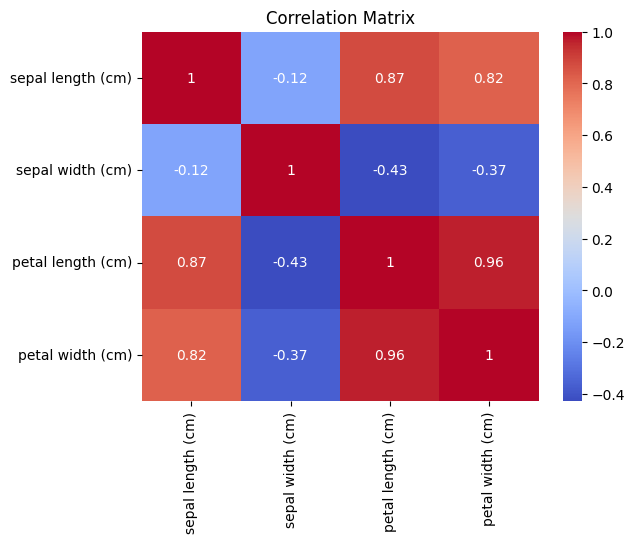

In [14]:
correlation_matrix = dataSet.drop(['label', 'species'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Its possible to see that sepal length and petal (lenhth, width) are highly correlated. Just like petal width and petal length, but its already expeted.

## Exercise 2



In [19]:
# select variables to predict the species
indepedent_variables = dataSet.drop(['label', 'species'], axis=1)
dependent_variable = dataSet['species']
indepedent_variables = indepedent_variables.iloc[:, 2:4]
indepedent_variables

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


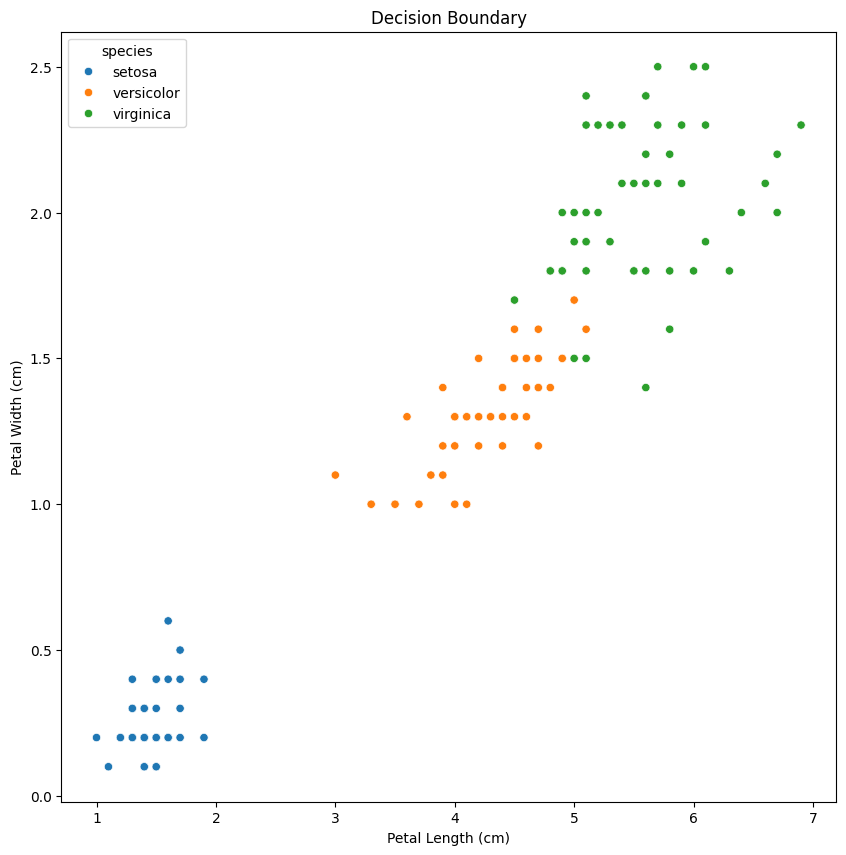

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [36]:
#based in indepedent_variables, we can see that the best variables to predict the species are petal length and petal width

X_train, X_test, y_train, y_test = train_test_split(indepedent_variables, dependent_variable, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
# plot the decision boundary
plt.figure(figsize=(10, 10))
sns.scatterplot(data=dataSet, x='petal length (cm)', y='petal width (cm)', hue='species', markers=['o', 'x', '*'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary')
plt.show()
print(classification_report(y_test, y_pred))
